# Neural Network

Neural networks are simple models of the way the nervous system operates. The basic units are neurons, which are typically organized into layers, as shown in the following figure.

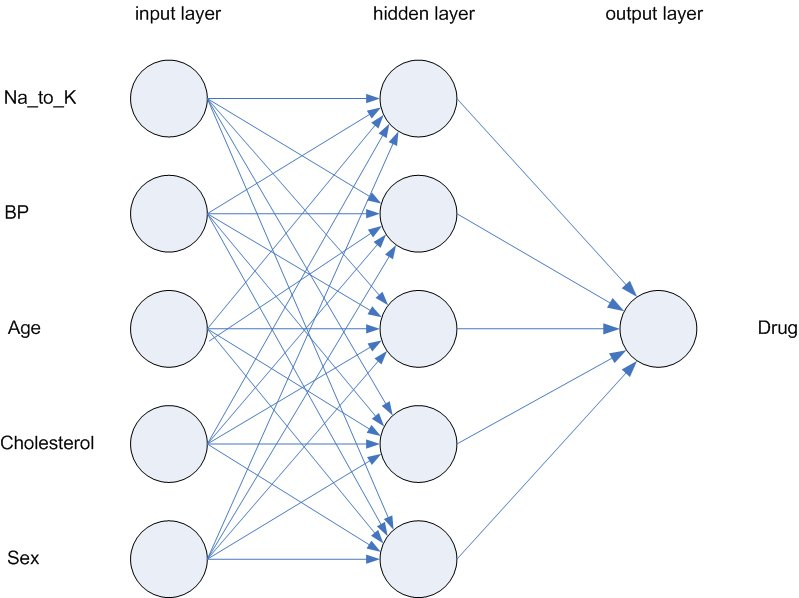

 - A neural network is a simplified model of the way the human brain processes information. It works by simulating a large number of interconnected processing units that resemble abstract versions of neurons.

 - The processing units are arranged in layers. There are typically three parts in a neural network: an input layer, with units representing the input fields; one or more hidden layers; and an output layer, with a unit or units representing the target field(s). The units are connected with varying connection strengths (or weights). Input data are presented to the first layer, and values are propagated from each neuron to every neuron in the next layer. Eventually, a result is delivered from the output layer.

 - The network learns by examining individual records, generating a prediction for each record, and making adjustments to the weights whenever it makes an incorrect prediction. This process is repeated many times, and the network continues to improve its predictions until one or more of the stopping criteria have been met.

 - Initially, all weights are random, and the answers that come out of the net are probably nonsensical. The network learns through training. Examples for which the output is known are repeatedly presented to the network, and the answers it gives are compared to the known outcomes. Information from this comparison is passed back through the network, gradually changing the weights. As training progresses, the network becomes increasingly accurate in replicating the known outcomes. Once trained, the network can be applied to future cases where the outcome is unknown.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
tf.random.set_seed(42)
import tensorflow.keras.backend as K
import tensorflow.keras.layers as layers
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from matplotlib.pyplot import rcParams

In [25]:
df = pd.read_csv('Clean_Dataset.csv', header = 0)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [26]:
df.columns
#df.drop(['	Unnamed: 0'])

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [27]:
df=df.drop(['Unnamed: 0','airline','flight','source_city','destination_city'],axis=1)
df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price
0,Evening,zero,Night,Economy,2.17,1,5953
1,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,Morning,zero,Afternoon,Economy,2.25,1,5955
4,Morning,zero,Morning,Economy,2.33,1,5955


In [29]:
df_new= pd.get_dummies(df, columns=['departure_time','stops','arrival_time',
                                    'class'], drop_first=True)
df_new.head()

,duration,days_left,price,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Economy
0,2.17,1,5953,0,1,0,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,1,0,0,0,0,0,1,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,1,1,0,0,0,0,1
3,2.25,1,5955,0,0,0,1,0,0,1,0,0,0,0,0,1
4,2.33,1,5955,0,0,0,1,0,0,1,0,0,0,1,0,1


### Feature engineering

We see there are many features, so PCA can be applied to reduce the dimension.

In [30]:
y=df['price']
X=df_new.drop(['price'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A60396AA60>,
      dtype=object)

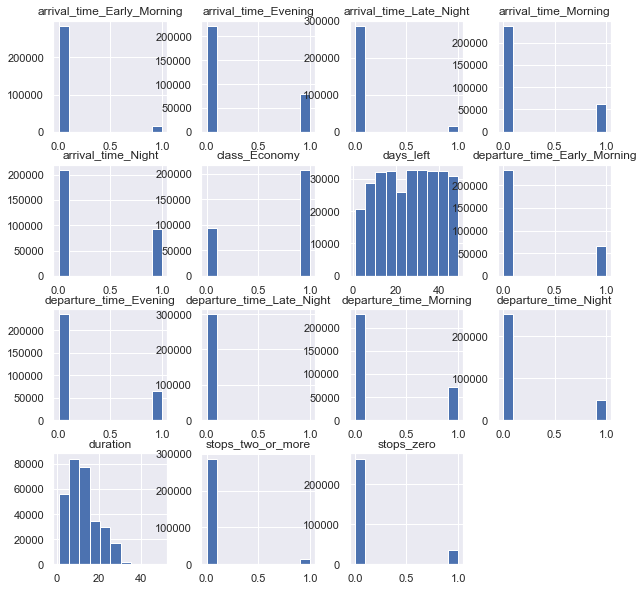

In [39]:
rcParams['figure.figsize'] = 10,10
X.hist()

(array([1.93661e+05, 1.64290e+04, 6.99100e+03, 2.35870e+04, 4.26690e+04,
        1.26380e+04, 3.39200e+03, 6.56000e+02, 1.15000e+02, 1.50000e+01]),
 array([  1105. ,  13301.6,  25498.2,  37694.8,  49891.4,  62088. ,
         74284.6,  86481.2,  98677.8, 110874.4, 123071. ]),
 <a list of 10 Patch objects>)

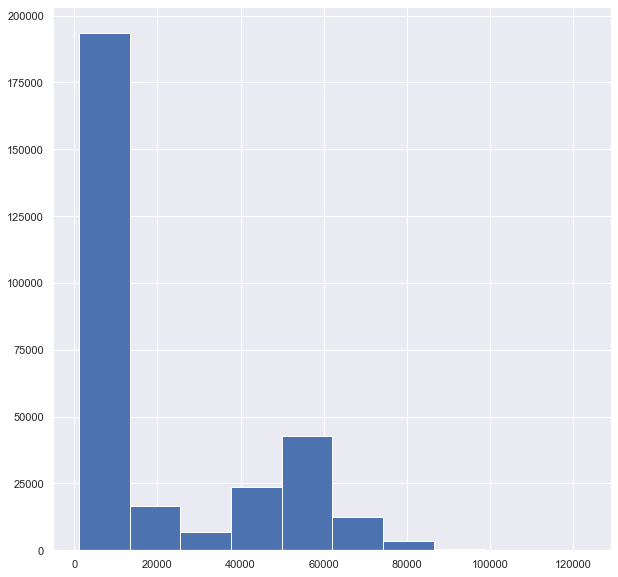

In [41]:
plt.hist(y)

### log transformation

In [44]:
y=np.log(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.preprocessing import StandardScaler
stdscalar =StandardScaler()
X_train =  stdscalar.fit_transform(X_train)
X_test =  stdscalar.transform(X_test)

###  Neural network (Multiple layer perception)

Construct the MLP by keras api

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 42
np.random.seed(seed)
dim= np.shape(X_train)[1]
# Model
model = Sequential()
model.add(Dense(256, input_dim=dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='Adam')


model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0276
Epoch 2/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0019
Epoch 3/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0018
Epoch 4/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0017
Epoch 5/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0016
Epoch 6/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0015
Epoch 7/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0015
Epoch 8/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0014
Epoch 9/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0014
Epoch 10/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0014
Epoch 11/100
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0013
Epoch 12/100
3283/3283 [==============================] - 4s 1ms/step - lo

In [47]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.0010658375590018587

Text(0.5, 1.0, 'Predictions x logged flight price on dataset Test')

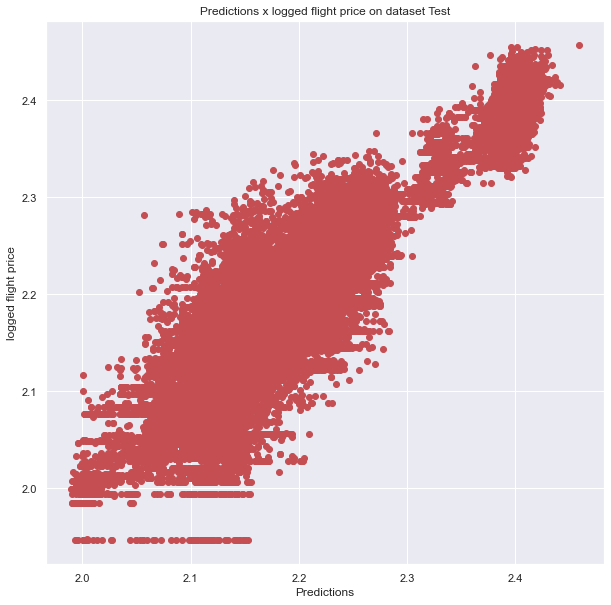

In [50]:

plt.plot(y_pred, y_test, 'ro')
plt.xlabel('Predictions')
plt.ylabel('logged flight price')
plt.title('Predictions x logged flight price on dataset Test')


### Conclusion

Based on mse on test set and the plot of real logged flight price and predicted value, our simple MLP model predicts the flight price well. The key point here is the log-transform of the flight price.